# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Understanding Data 

In [2]:
# Loading Dataset
df = pd.read_csv('house dataset.csv')

In [3]:
# Showing Dataset
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
# This code randomly selects 7 rows from the DataFrame 'df' and returns them as a new DataFrame
df.sample(7)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
4101,7202340930,14 December 2017,634800.0,4,3.00,3280.0,4904.0,2.0,No,None,...,7,3280.0,0,13,0,98053.0,47.6802,-122.033,2600.0,5004
13173,2113700205,14 July 2017,220000.0,4,1.00,1200.0,6000.0,1.5,No,None,...,6,1200.0,0,95,0,98106.0,47.5307,-122.352,950.0,4000
15231,7625701900,15 February 2016,467500.0,2,1.75,1490.0,4800.0,1.0,No,None,...,7,750.0,740,100,0,98136.0,47.5496,-122.391,1400.0,6000
16439,6457000080,14 August 2017,269900.0,5,1.75,1750.0,8325.0,1.0,No,None,...,7,1750.0,0,52,0,98031.0,47.4007,-122.198,1430.0,8325
15812,2250000010,14 December 2017,294450.0,4,2.25,1400.0,7341.0,1.0,No,None,...,7,1300.0,100,57,0,98155.0,47.7565,-122.305,2090.0,7410
10226,8945100320,14 May 2017,136500.0,3,1.50,1420.0,8580.0,1.0,No,None,...,6,1420.0,0,56,0,98023.0,47.3076,-122.362,1200.0,8580
4631,203600590,14 June 2017,641000.0,4,2.50,2770.0,63118.0,2.0,No,None,...,9,2770.0,0,21,0,98014.0,47.6622,-121.961,2770.0,44224


In [5]:
# check how data big is or shape of the dataset 
df.shape

(21613, 21)

In [6]:
# check summary or information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [7]:
# Check is there any duplicate values in a dataset or not
df.duplicated().sum()

0

In [8]:
# check if dataset having null values or not
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [9]:
# Check total number of missing values in a dataset
df.isnull().sum().sum()

33

In [10]:
# calculate the percentage of missing values in each column of a dataset 
df.isnull().mean()*100

ID                                           0.000000
Date House was Sold                          0.000000
Sale Price                                   0.018507
No of Bedrooms                               0.000000
No of Bathrooms                              0.018507
Flat Area (in Sqft)                          0.041642
Lot Area (in Sqft)                           0.041642
No of Floors                                 0.000000
Waterfront View                              0.000000
No of Times Visited                          0.000000
Condition of the House                       0.000000
Overall Grade                                0.000000
Area of the House from Basement (in Sqft)    0.013881
Basement Area (in Sqft)                      0.000000
Age of House (in Years)                      0.000000
Renovated Year                               0.000000
Zipcode                                      0.004627
Latitude                                     0.004627
Longitude                   

In [11]:
# Drop 'ID' column
df = df.drop('ID', axis=1)

# Handling Missing Values 

In [12]:
# Identify columns in DataFrame 'df' with at least one missing value and store their names in 'missing_values_columns'
columns = df.columns
missing_values_columns = [column for column in columns if df[column].isnull().sum() > 0]

In [13]:
# Identify columns in DataFrame 'df' with sum of missing values and store their names in 'sum_of_missing_values' column
sum_of_missing_values = df[missing_values_columns].isnull().sum()
sum_of_missing_values

Sale Price                                   4
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
Area of the House from Basement (in Sqft)    3
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
dtype: int64

In [14]:
# Check total number of missing values in a dataset
df.isnull().sum().sum()

33

In [15]:
# Drop missing values from the column
df = df.dropna(subset=['Sale Price','No of Bathrooms','Flat Area (in Sqft)' ,'Lot Area (in Sqft)', 
                         'Area of the House from Basement (in Sqft)', 'Zipcode','Latitude', 'Longitude', 
                         'Living Area after Renovation (in Sqft)'])

In [16]:
# check if dataset having null values or not
df.isnull().sum()

Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [17]:
# Check total number of missing values in a dataset
df.isnull().sum().sum()

0

In [18]:
# check how data big is or shape of the dataset 
df.shape

(21580, 20)

In [19]:
# check summary or information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21580 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date House was Sold                        21580 non-null  object 
 1   Sale Price                                 21580 non-null  float64
 2   No of Bedrooms                             21580 non-null  int64  
 3   No of Bathrooms                            21580 non-null  float64
 4   Flat Area (in Sqft)                        21580 non-null  float64
 5   Lot Area (in Sqft)                         21580 non-null  float64
 6   No of Floors                               21580 non-null  float64
 7   Waterfront View                            21580 non-null  object 
 8   No of Times Visited                        21580 non-null  object 
 9   Condition of the House                     21580 non-null  object 
 10  Overall Grade         

# Get Statistical Information, Correlation Matrix and Value Counts of columns

In [20]:
""" This code provides statistical summary information about the DataFrame 'df,' including measures like count, mean, standard 
deviation, minimum, and maximum values for each numeric column. """

df.describe()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.158000e+04,21580.000000,21580.000000,21580.000000,2.158000e+04,21580.000000,21580.000000,21580.000000,21580.000000,21580.000000,21580.000000,21580.000000,21580.000000,21580.000000,21580.000000,21580.000000
mean,5.401245e+05,3.371223,2.114597,2079.896803,1.511585e+04,1.494231,7.623262,1788.456812,291.439991,47.003290,84.254588,98077.925394,47.559986,-122.213850,1986.478777,12775.341983
std,3.674325e+05,0.930086,0.770140,918.245846,4.144975e+04,0.539897,1.105684,828.057019,442.383441,29.366011,401.344975,53.513818,0.138572,0.140849,685.499001,27322.722954
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.210202e+05,3.000000,1.750000,1430.000000,5.042750e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470775,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571700,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.677900,-122.125000,2360.000000,10087.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [21]:
# This code calculates the correlation between numeric columns in the DataFrame 'df' and returns a correlation matrix
df.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_31204\1509688885.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
Sale Price,1.000000,0.308354,0.524909,0.701904,0.089606,0.257121,0.580509,0.605464,0.323615,-0.054066,0.126665,-0.053282,0.306846,0.021493,0.585345,0.082428
No of Bedrooms,0.308354,1.000000,0.515736,0.576654,0.031573,0.175594,0.349146,0.477434,0.303284,-0.154146,0.019318,-0.152762,-0.008654,0.129488,0.391647,0.029081
No of Bathrooms,0.524909,0.515736,1.000000,0.754486,0.087774,0.501160,0.635635,0.685235,0.283442,-0.506373,0.050855,-0.203948,0.024452,0.223106,0.568604,0.087232
Flat Area (in Sqft),0.701904,0.576654,0.754486,1.000000,0.172845,0.354525,0.705893,0.876658,0.434743,-0.318393,0.055759,-0.199559,0.052408,0.240292,0.756416,0.183316
Lot Area (in Sqft),0.089606,0.031573,0.087774,0.172845,1.000000,-0.005192,0.102311,0.183486,0.015319,-0.053170,0.007743,-0.129544,-0.085726,0.229476,0.144526,0.718524
No of Floors,0.257121,0.175594,0.501160,0.354525,-0.005192,1.000000,0.461399,0.524267,-0.245447,-0.489044,0.006801,-0.059179,0.049622,0.125563,0.280131,-0.011278
Overall Grade,0.580509,0.349146,0.635635,0.705893,0.102311,0.461399,1.000000,0.705082,0.145430,-0.456763,0.010472,-0.185730,0.111091,0.201517,0.681275,0.107494
Area of the House from Basement (in Sqft),0.605464,0.477434,0.685235,0.876658,0.183486,0.524267,0.705082,1.000000,-0.052149,-0.424044,0.023417,-0.261109,-0.000751,0.343708,0.731844,0.194005
Basement Area (in Sqft),0.323615,0.303284,0.283442,0.434743,0.015319,-0.245447,0.145430,-0.052149,1.000000,0.132849,0.071905,0.074527,0.110188,-0.144587,0.200205,0.017366
Age of House (in Years),-0.054066,-0.154146,-0.506373,-0.318393,-0.053170,-0.489044,-0.456763,-0.424044,0.132849,1.000000,0.224390,0.347028,0.148249,-0.409463,-0.326448,-0.071073


In [22]:
# This code calculates the correlation of each numeric column with the 'Sale Price' column in the DataFrame 'df'
df.corr()['Sale Price']

C:\Users\Dell\AppData\Local\Temp\ipykernel_31204\3722433841.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Sale Price']


Sale Price                                   1.000000
No of Bedrooms                               0.308354
No of Bathrooms                              0.524909
Flat Area (in Sqft)                          0.701904
Lot Area (in Sqft)                           0.089606
No of Floors                                 0.257121
Overall Grade                                0.580509
Area of the House from Basement (in Sqft)    0.605464
Basement Area (in Sqft)                      0.323615
Age of House (in Years)                     -0.054066
Renovated Year                               0.126665
Zipcode                                     -0.053282
Latitude                                     0.306846
Longitude                                    0.021493
Living Area after Renovation (in Sqft)       0.585345
Lot Area after Renovation (in Sqft)          0.082428
Name: Sale Price, dtype: float64

In [23]:
# Extract 'object' columns from the dataset and see value_counts
for i in df.columns:
    if df[i].dtype == 'object':
        val = df[i].value_counts()
        print(pd.DataFrame(val))
        print('\r')

                   Date House was Sold
15 April 2016                     2228
14 July 2017                      2208
14 June 2017                      2177
14 August 2017                    1936
14 October 2017                   1875
15 March 2016                     1871
14 September 2017                 1769
14 May 2017                       1766
14 December 2017                  1471
14 November 2017                  1409
15 February 2016                  1247
15 January 2016                    977
15 May 2016                        646

     Waterfront View
No             21417
Yes              163

        No of Times Visited
None                  19459
Twice                   962
Thrice                  509
Once                    331
Four                    319

           Condition of the House
Fair                        14010
Good                         5670
Excellent                    1698
Okay                          172
Bad                            30



In [24]:
# Converting columns from float64 to int64
df['No of Bathrooms'] = df['No of Bathrooms'].astype('int64')
df['No of Floors'] = df['No of Floors'].astype('int64')
df['Zipcode'] = df['Zipcode'].astype('int64')

In [25]:
# Extract 'integer' columns from the dataset and see value_counts
for i in df.columns:
    if df[i].dtype == 'int64':
        val = df[i].value_counts()
        print(pd.DataFrame(val))
        print('\r')

    No of Bedrooms
3             9809
4             6873
2             2752
5             1601
6              271
1              199
7               38
0               13
8               13
9                6
10               3
11               1
33               1

   No of Bathrooms
2            10522
1             8346
3             2225
4              337
0               86
5               48
6               12
8                2
7                2

   No of Floors
1         12572
2          8389
3           619

    Overall Grade
7            8967
8            6056
9            2611
6            2037
10           1621
5             242
4              29
2              13
3               3
1               1

      Basement Area (in Sqft)
0                       13107
600                       220
700                       218
500                       214
800                       206
...                       ...
784                         1
906                         1
506     

In [26]:
# Extract 'float' columns from the dataset and see value_counts
for i in df.columns:
    if df[i].dtype == 'float64':
        val = df[i].value_counts()
        print(pd.DataFrame(val))
        print('\r')

           Sale Price
350000.0          172
450000.0          171
550000.0          159
500000.0          152
425000.0          150
...               ...
926500.0            1
811500.0            1
6890000.0           1
931088.0            1
402101.0            1

[3624 rows x 1 columns]

        Flat Area (in Sqft)
1300.0                  138
1400.0                  135
1440.0                  133
1800.0                  129
1010.0                  129
...                     ...
5844.0                    1
2507.0                    1
9890.0                    1
5584.0                    1
1425.0                    1

[1035 rows x 1 columns]

          Lot Area (in Sqft)
5000.0                   357
6000.0                   289
4000.0                   249
7200.0                   220
4800.0                   120
...                      ...
9934.0                     1
9142.0                     1
24330.0                    1
215622.0                   1
1076.0                     1


# Data Visualisation 

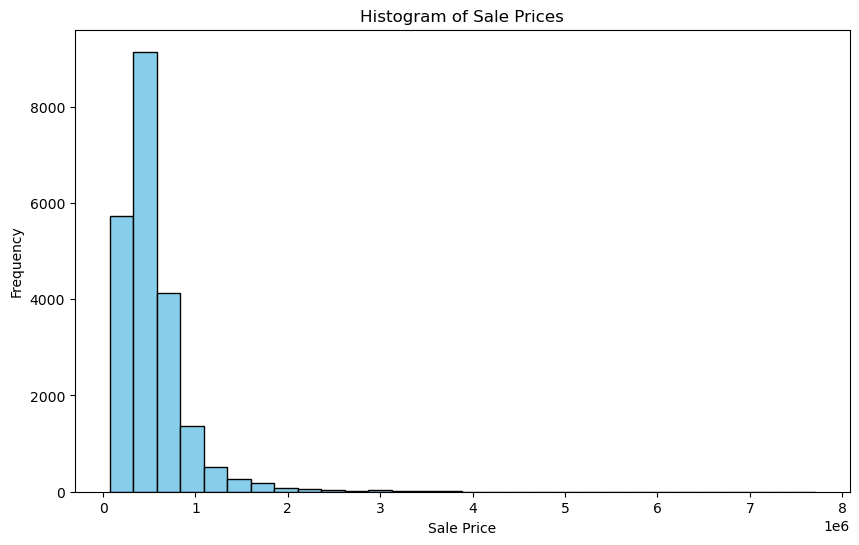

In [27]:
# Plotting Histogram for Sale Price
plt.figure(figsize=(10, 6))

# Plotting the histogram
plt.hist(df['Sale Price'], bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Histogram of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

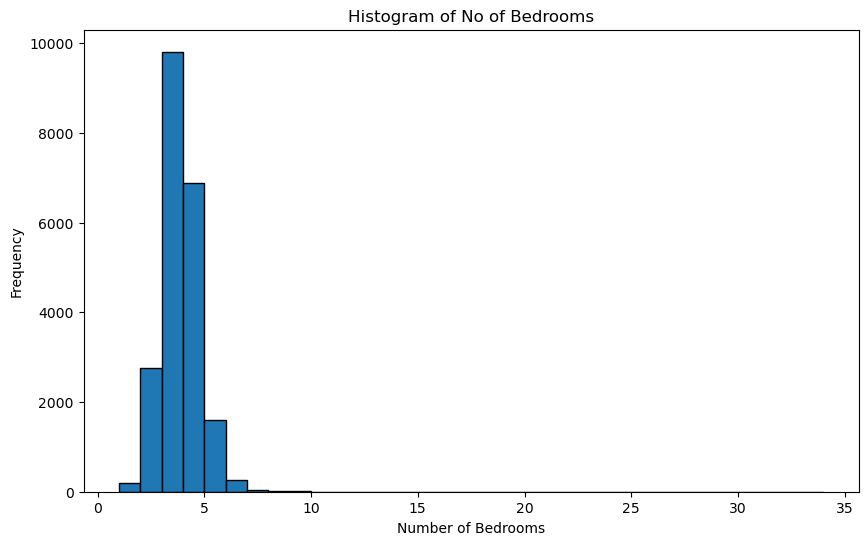

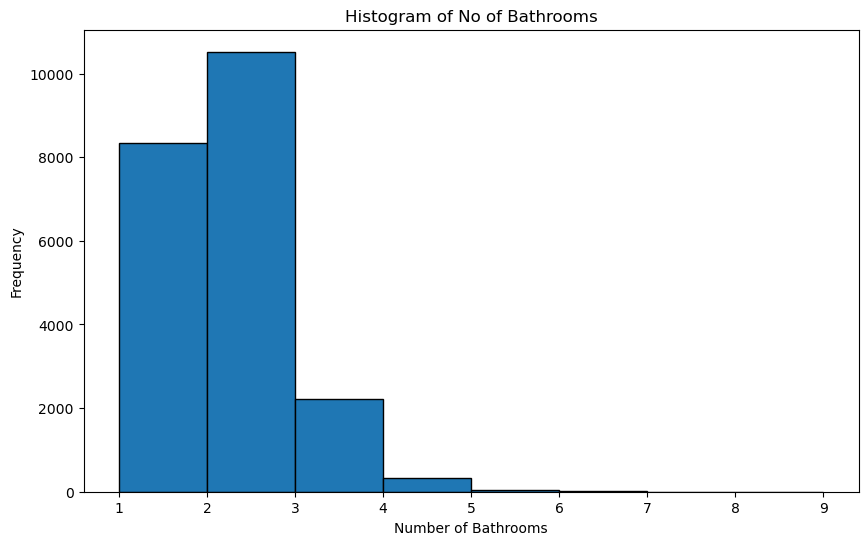

In [28]:
# Plotting histogram for 'No of Bedrooms'
plt.figure(figsize=(10, 6))
plt.hist(df['No of Bedrooms'], bins=range(1, max(df['No of Bedrooms']) + 2), edgecolor='black')
plt.title('Histogram of No of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

# Plotting histogram for 'No of Bathrooms'
plt.figure(figsize=(10, 6))
plt.hist(df['No of Bathrooms'], bins=range(1, int(max(df['No of Bathrooms'])) + 2), edgecolor='black')
plt.title('Histogram of No of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.show()

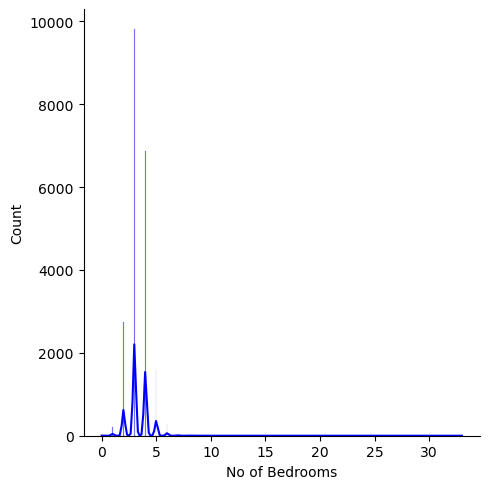

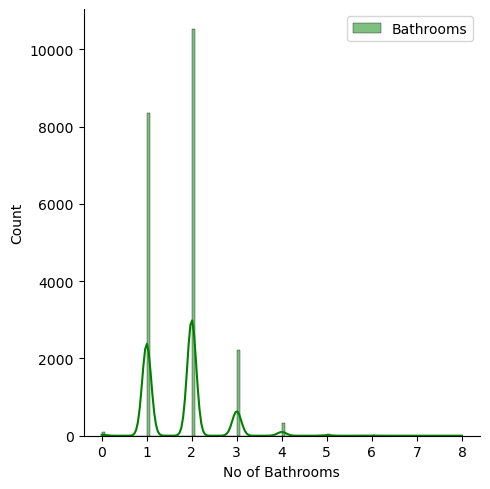

In [29]:
# Plotting displot for 'No of Bedrooms' and 'No of Bathrooms' to check distribution
sns.displot(data=df, x='No of Bedrooms', kde=True, label='Bedrooms', color='blue')
sns.displot(data=df, x='No of Bathrooms', kde=True, label='Bathrooms', color='green')

# Show the legend
plt.legend()

# Show the plot
plt.show()

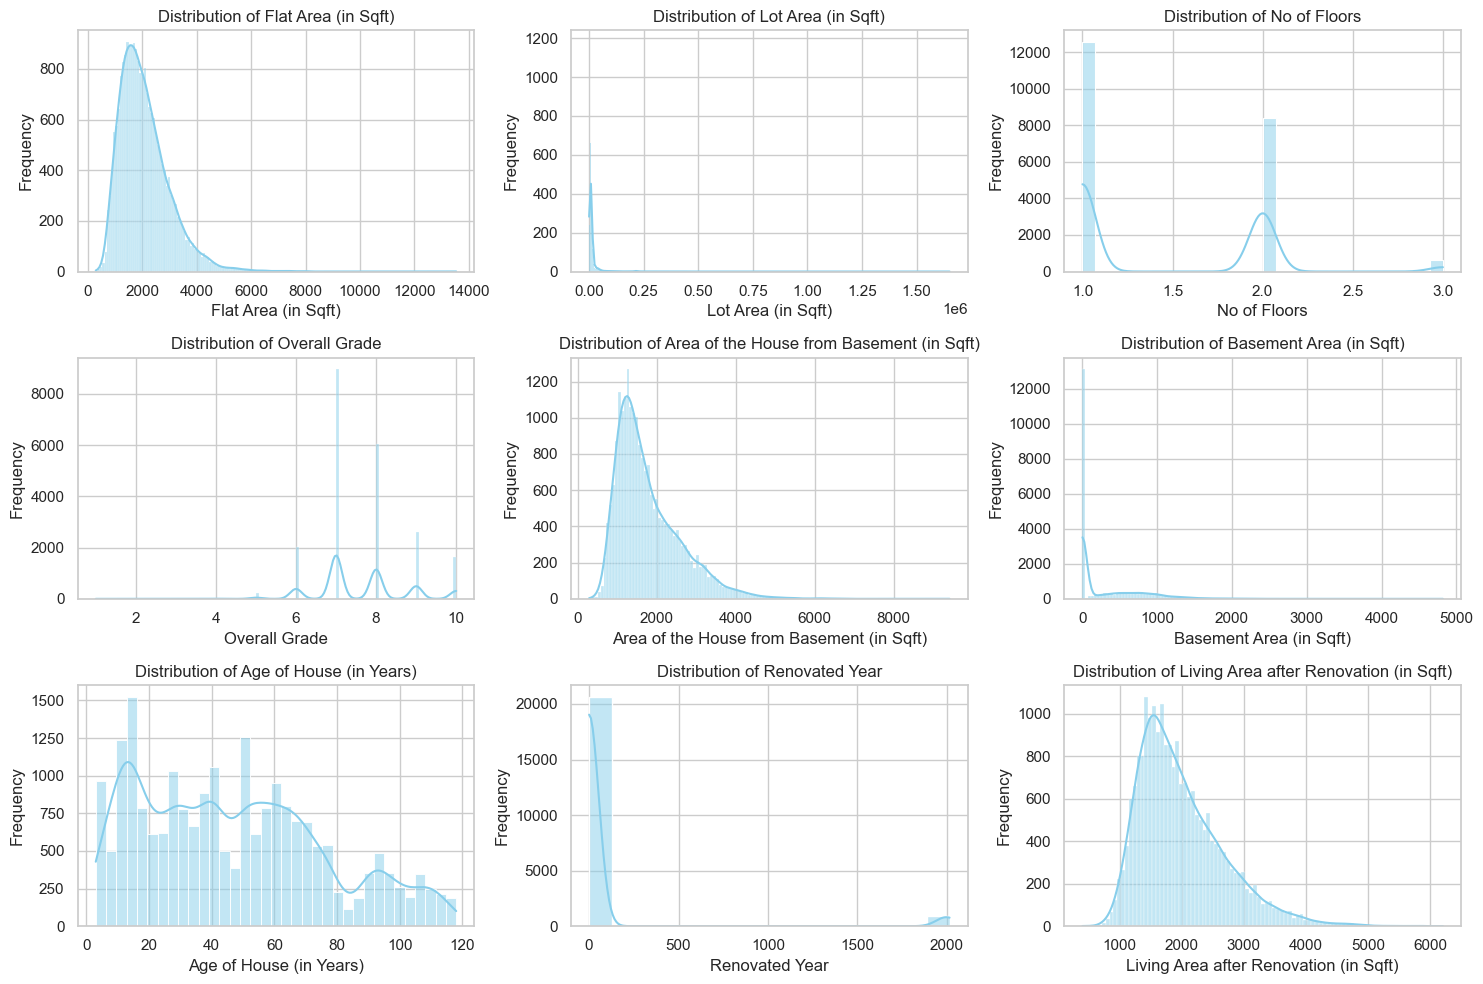

In [30]:
# Plotting distplot for given below columns to check distribution
columns_for_distplot = [
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'No of Floors',
    'Overall Grade',
    'Area of the House from Basement (in Sqft)',
    'Basement Area (in Sqft)',
    'Age of House (in Years)',
    'Renovated Year',
    'Living Area after Renovation (in Sqft)'
]

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot distplots for each specified column
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, column in enumerate(columns_for_distplot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

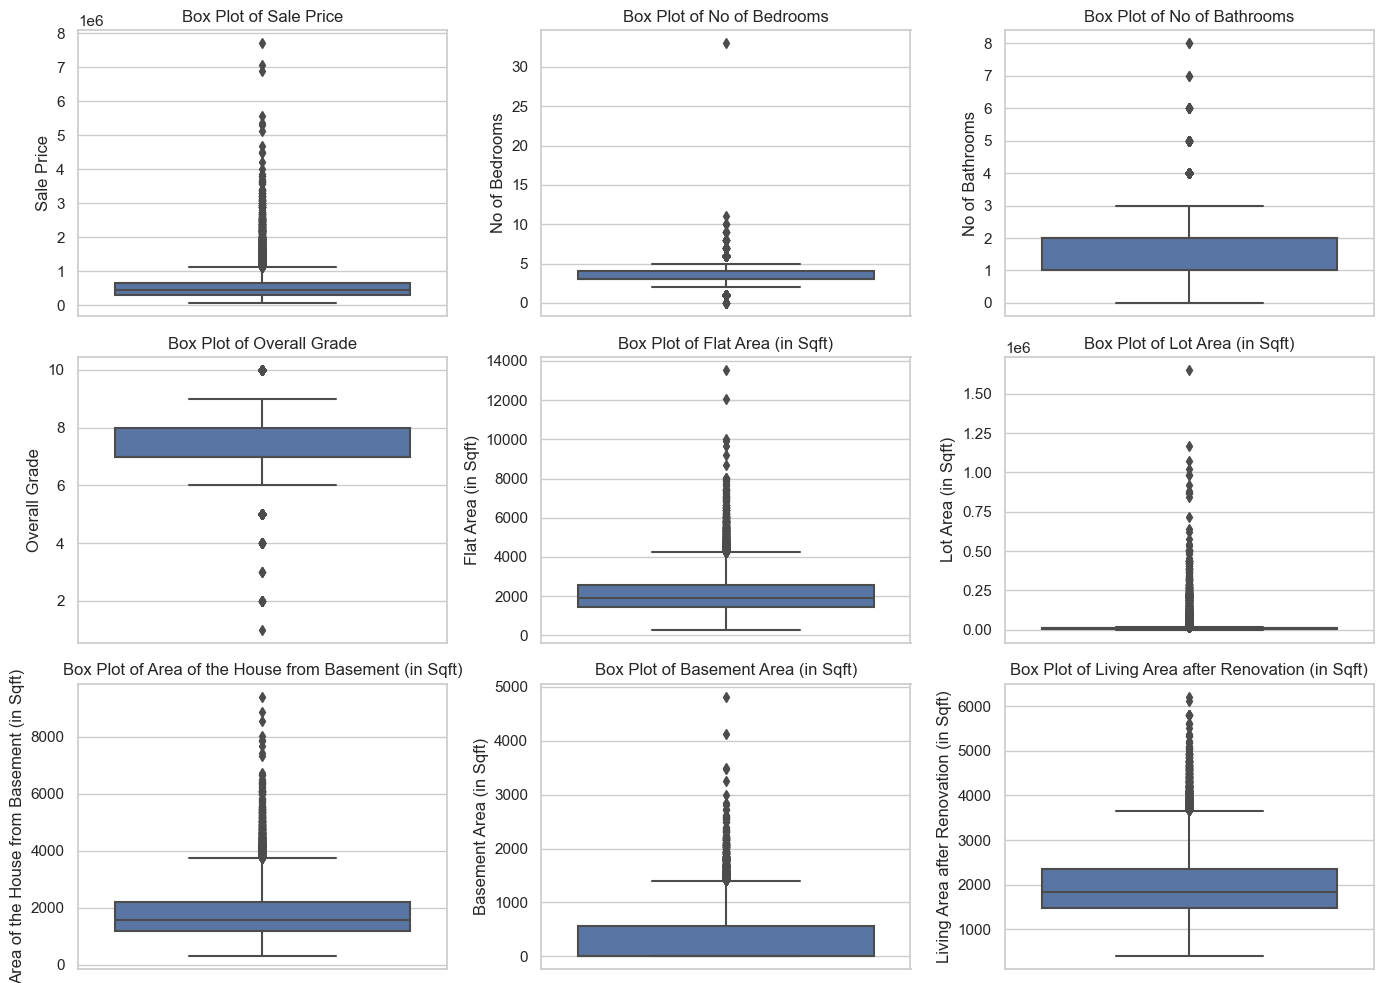

In [31]:
# Box Plot

# List of columns for which you want box plots
columns_for_boxplot = [
    'Sale Price',
    'No of Bedrooms',
    'No of Bathrooms',
    'Overall Grade',
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'Area of the House from Basement (in Sqft)',
    'Basement Area (in Sqft)',
    'Living Area after Renovation (in Sqft)'
]

# Set up the plotting environment
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Plot box plots for each column
for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(3, 3, i)  # Adjusted the subplot layout to 3 rows and 3 columns
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

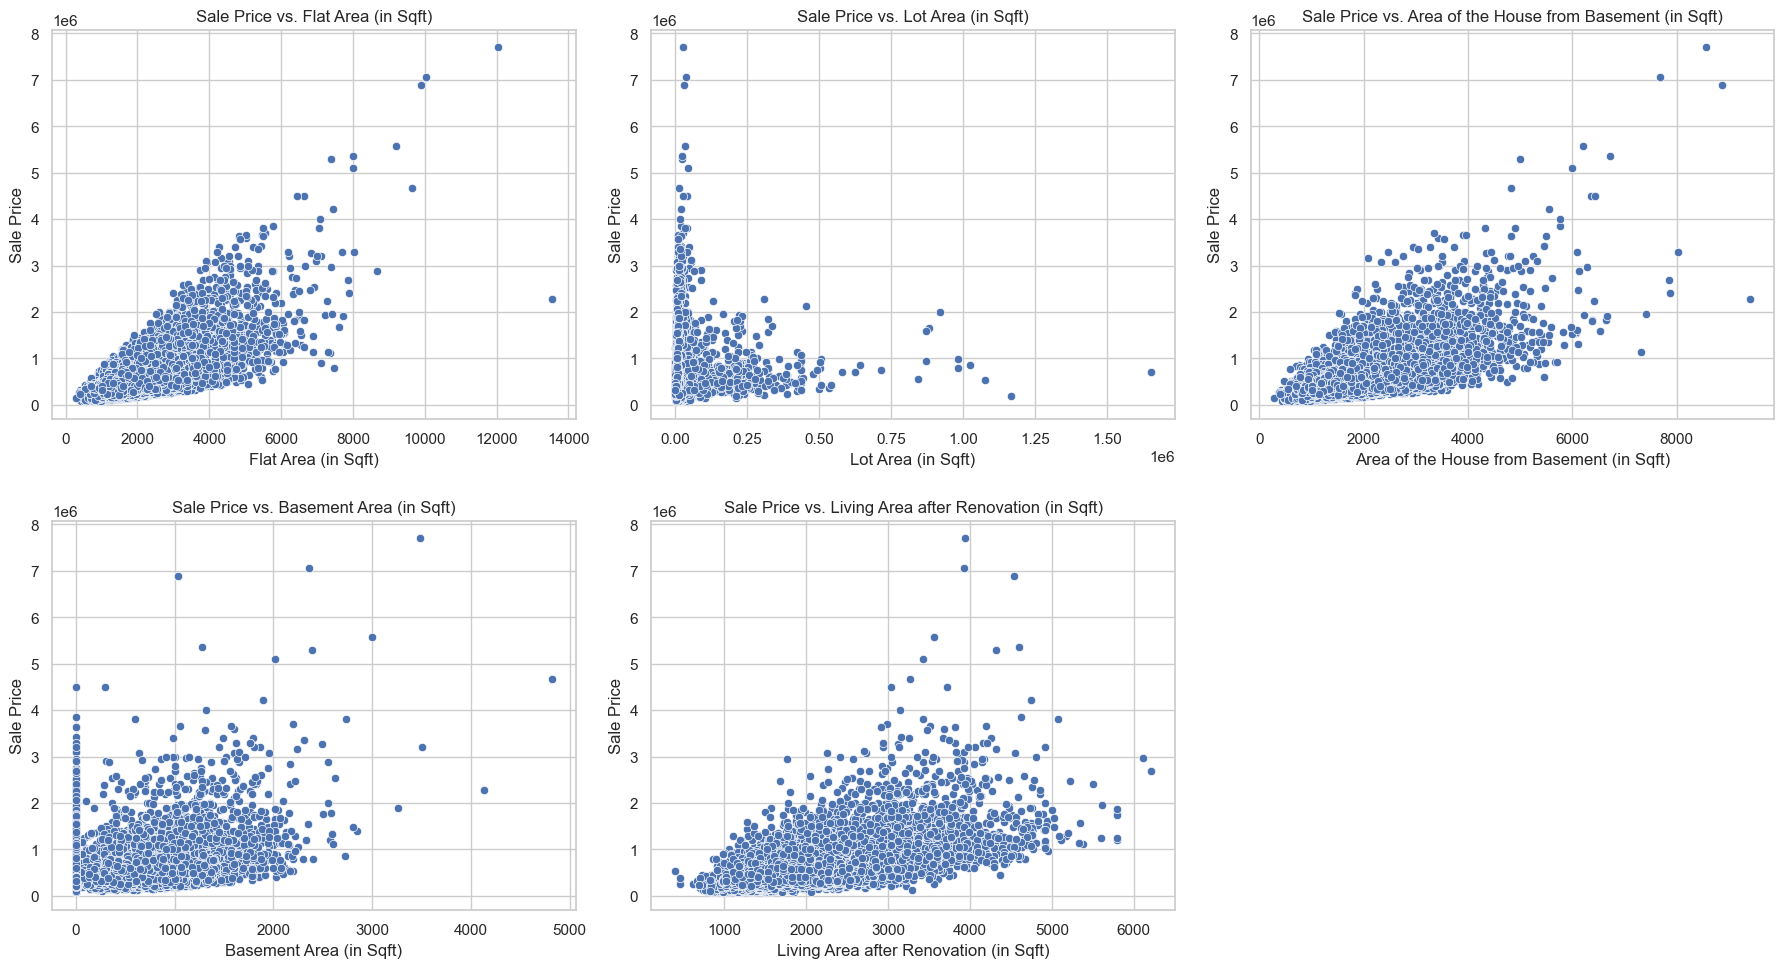

In [32]:
# Scatter Plot

# List of columns for scatter plots
scatter_columns = [
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'Area of the House from Basement (in Sqft)',
    'Basement Area (in Sqft)',
    'Living Area after Renovation (in Sqft)'
]

# Set up the plotting environment
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# Create scatter plots using a for loop
for i, column in enumerate(scatter_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[column], y=df['Sale Price'])
    plt.title(f'Sale Price vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

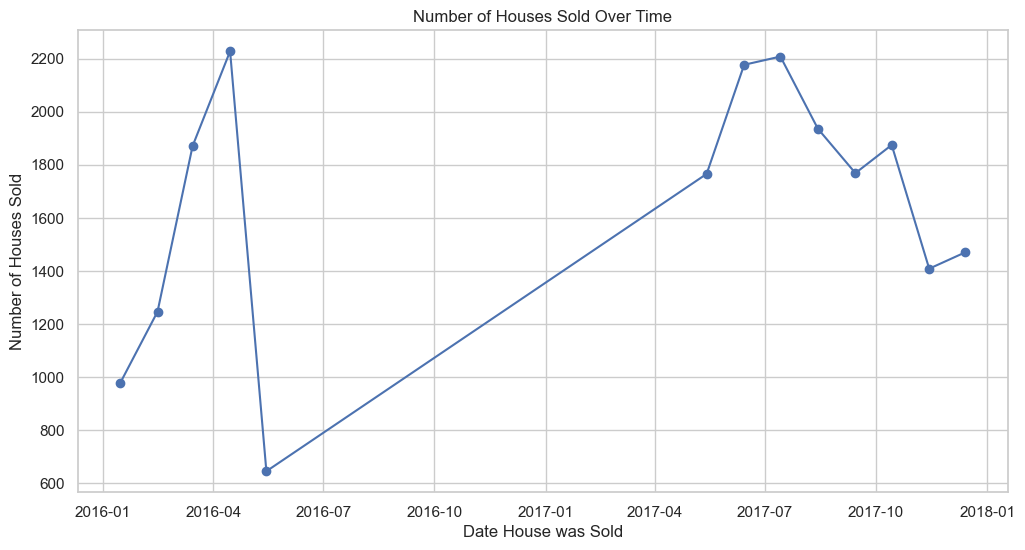

In [33]:
# Convert the 'Date House was Sold' column to datetime if it's not already
df['Date House was Sold'] = pd.to_datetime(df['Date House was Sold'])

# Group by date and count the number of houses sold on each day
sales_by_date = df.groupby('Date House was Sold').size().reset_index(name='Number of Houses Sold')

# Set up the plotting environment
plt.figure(figsize=(12, 6))

# Create a line chart
plt.plot(sales_by_date['Date House was Sold'], sales_by_date['Number of Houses Sold'], marker='o', linestyle='-')

# Customize the plot
plt.title('Number of Houses Sold Over Time')
plt.xlabel('Date House was Sold')
plt.ylabel('Number of Houses Sold')

# Show the plot
plt.show()

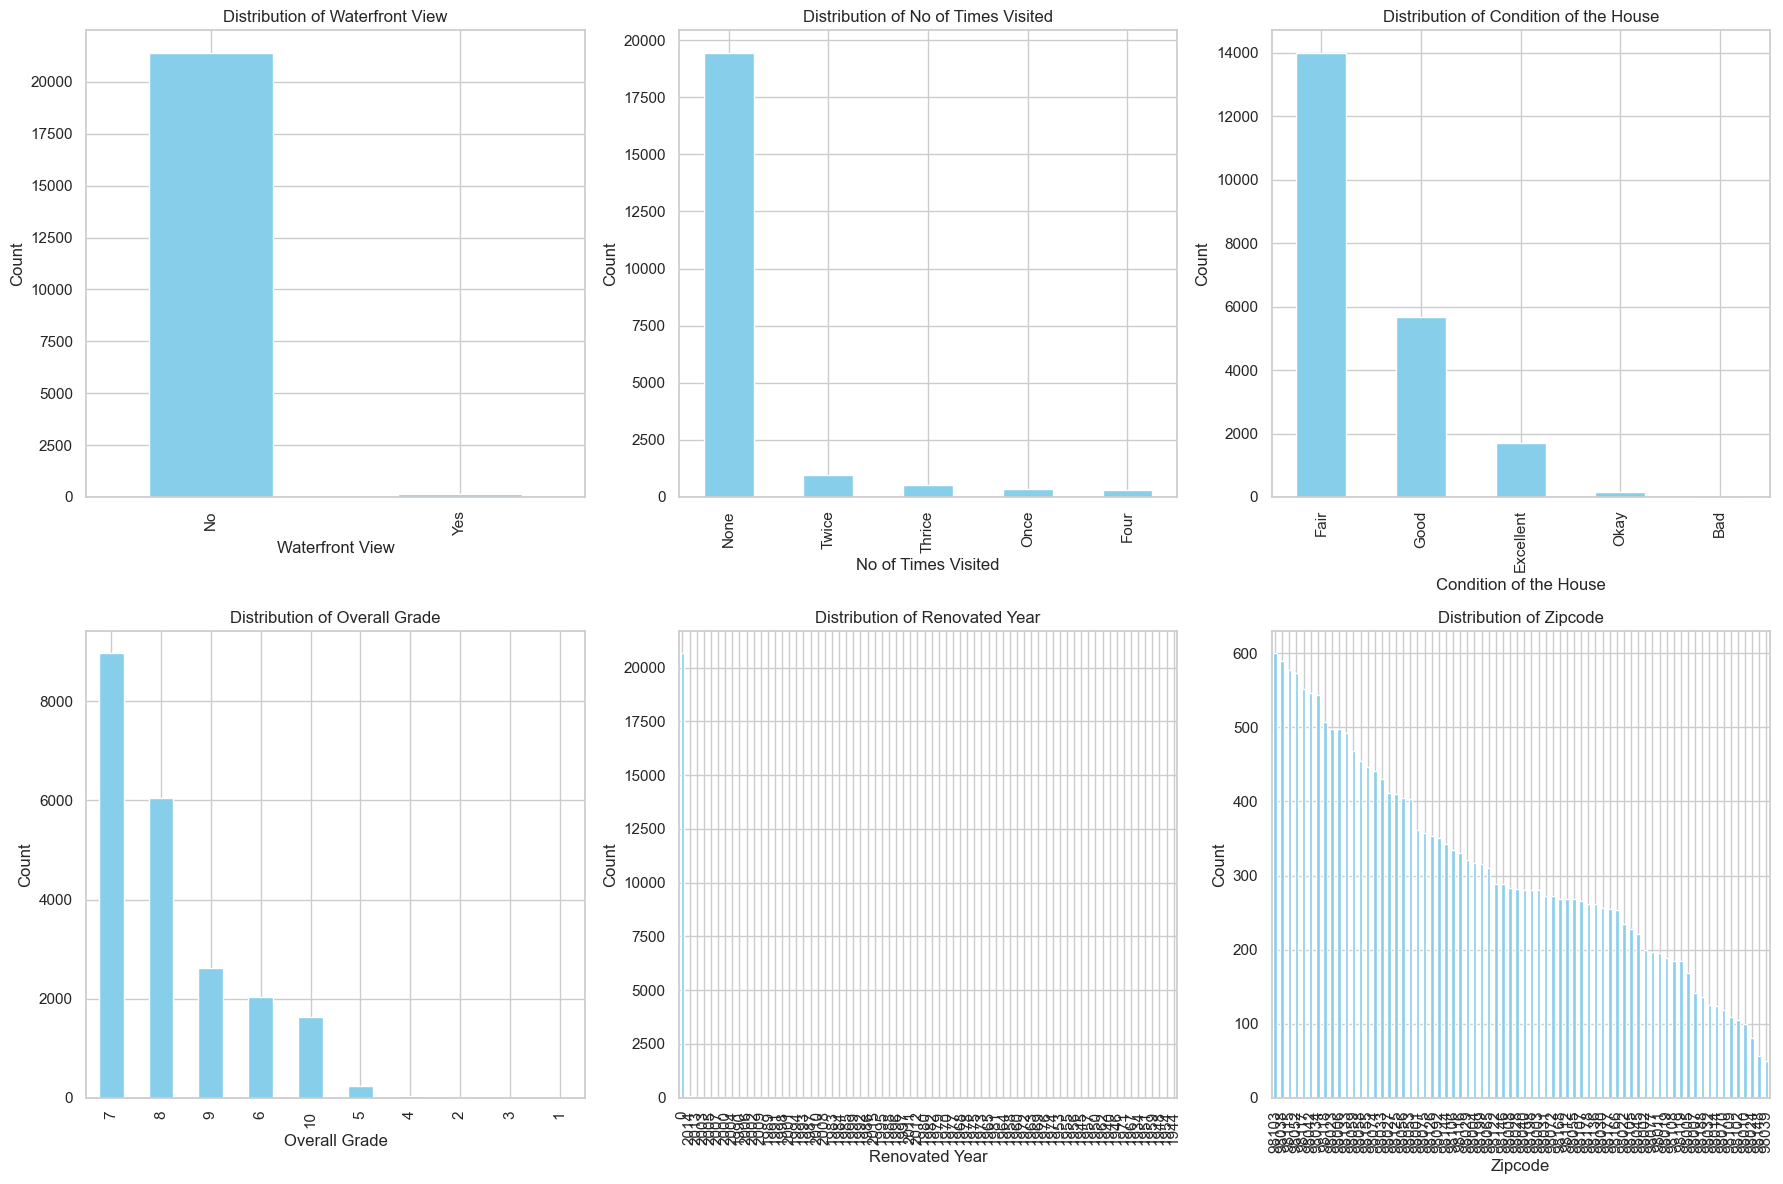

In [34]:
# Bar Plot

# List of columns for bar charts
bar_columns = [
    'Waterfront View',
    'No of Times Visited',
    'Condition of the House',
    'Overall Grade',
    'Renovated Year',
    'Zipcode'
]

# Set up the plotting environment
plt.figure(figsize=(18, 12))

# Create bar charts using a for loop
for i, column in enumerate(bar_columns, 1):
    plt.subplot(2, 3, i)
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

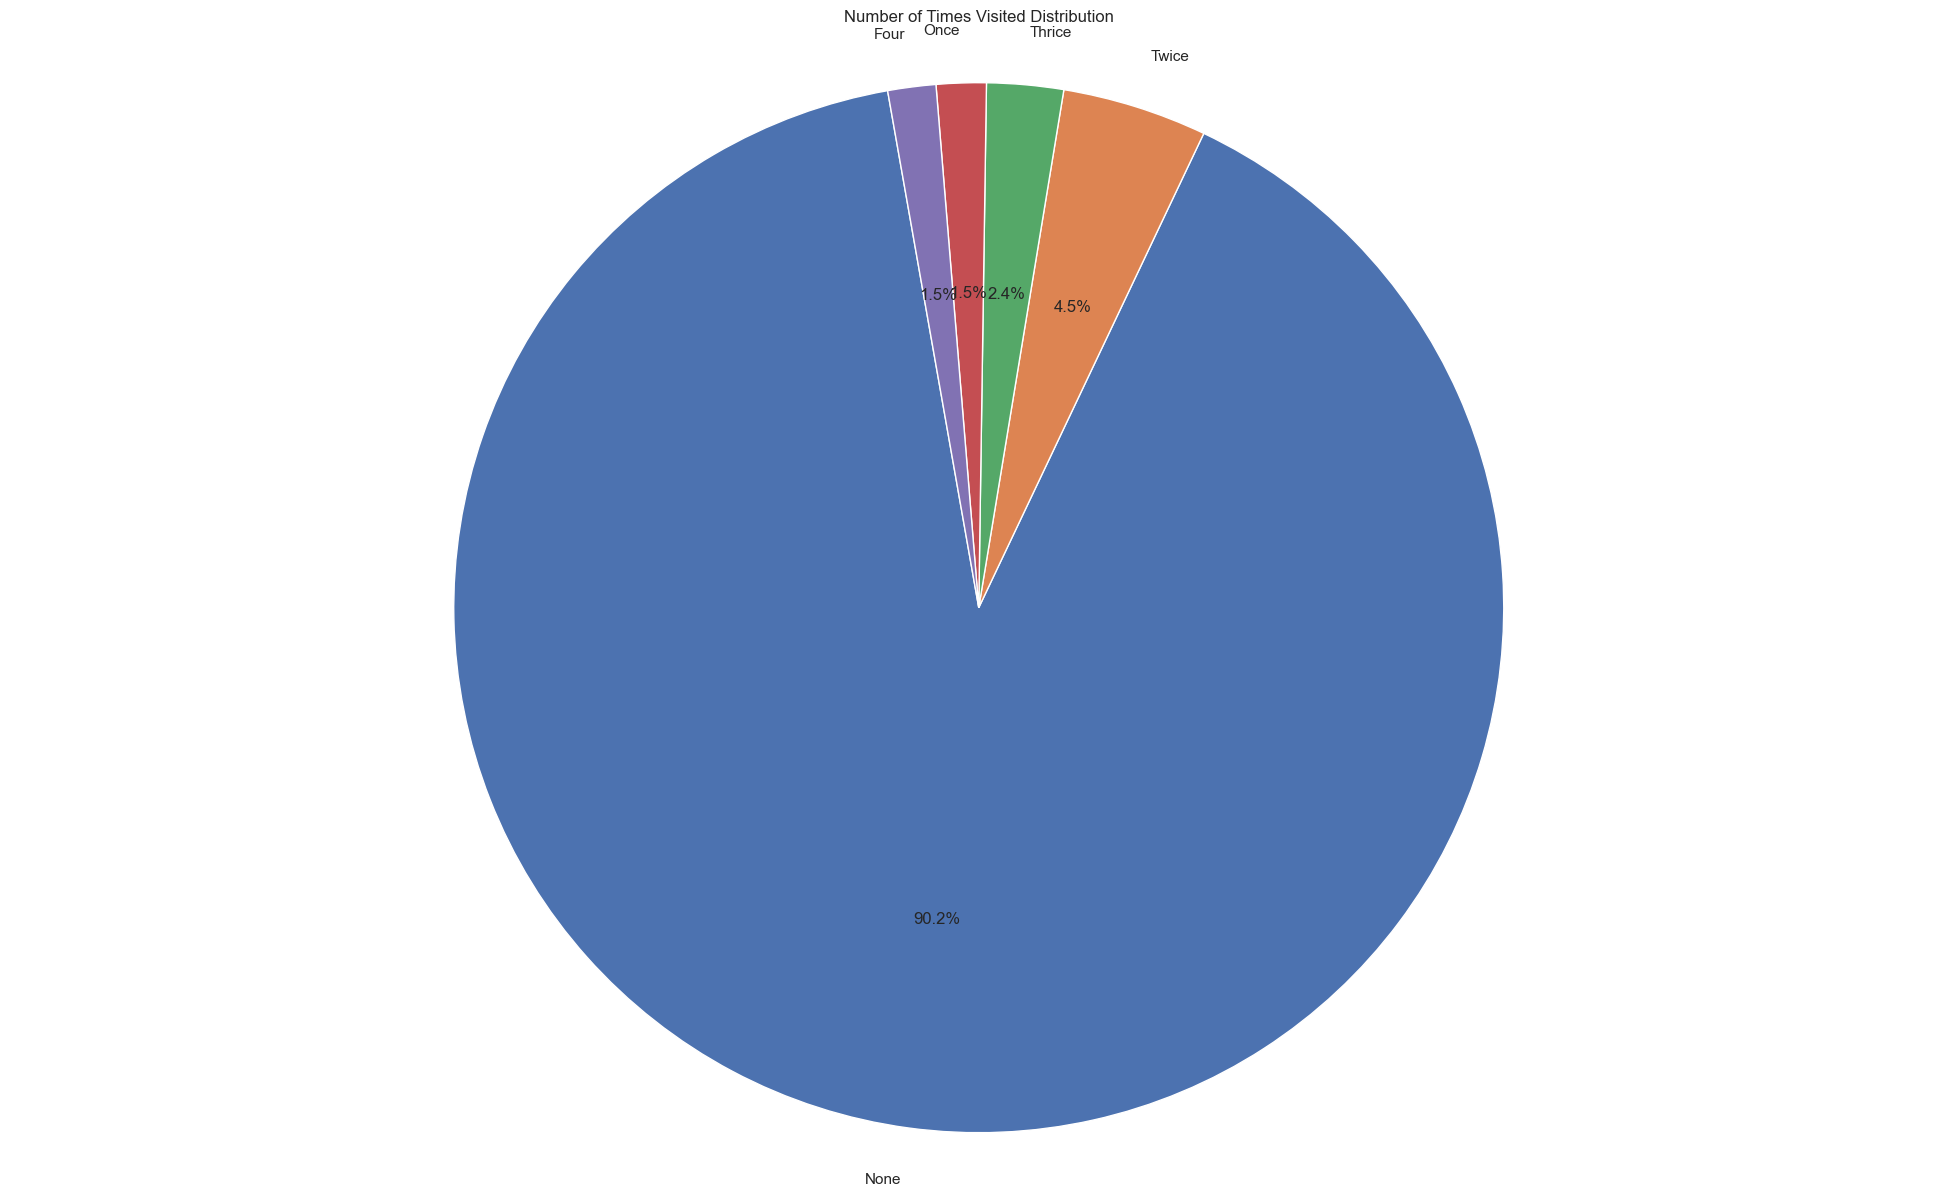

In [35]:
# Pie Plot for ' No of Times Visited' column
visited_counts = df['No of Times Visited'].value_counts()

# Set the figure size
plt.figure(figsize=(25, 15))

# Plot a pie chart
plt.pie(visited_counts, labels=visited_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Number of Times Visited Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()

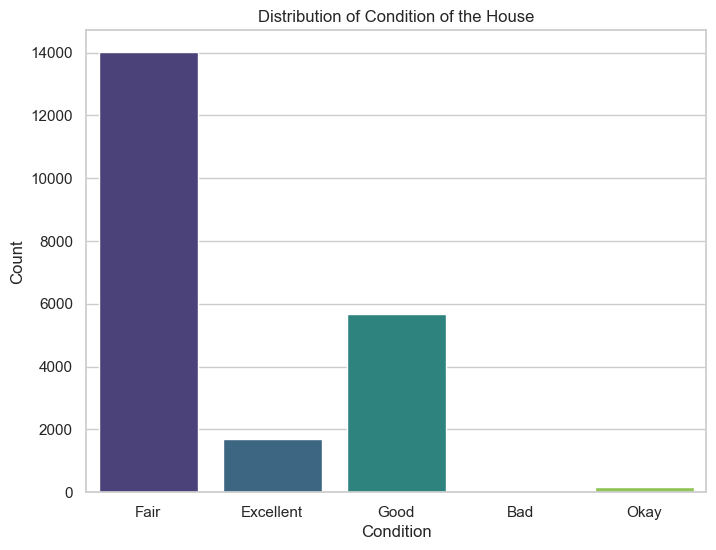

In [36]:
# Create a bar plot for the 'Condition of the House' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Condition of the House', data=df, palette='viridis')
plt.title('Distribution of Condition of the House')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_31204\3505370969.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Condition of the House', y='Sale Price', data=df, palette='viridis', ci=None)


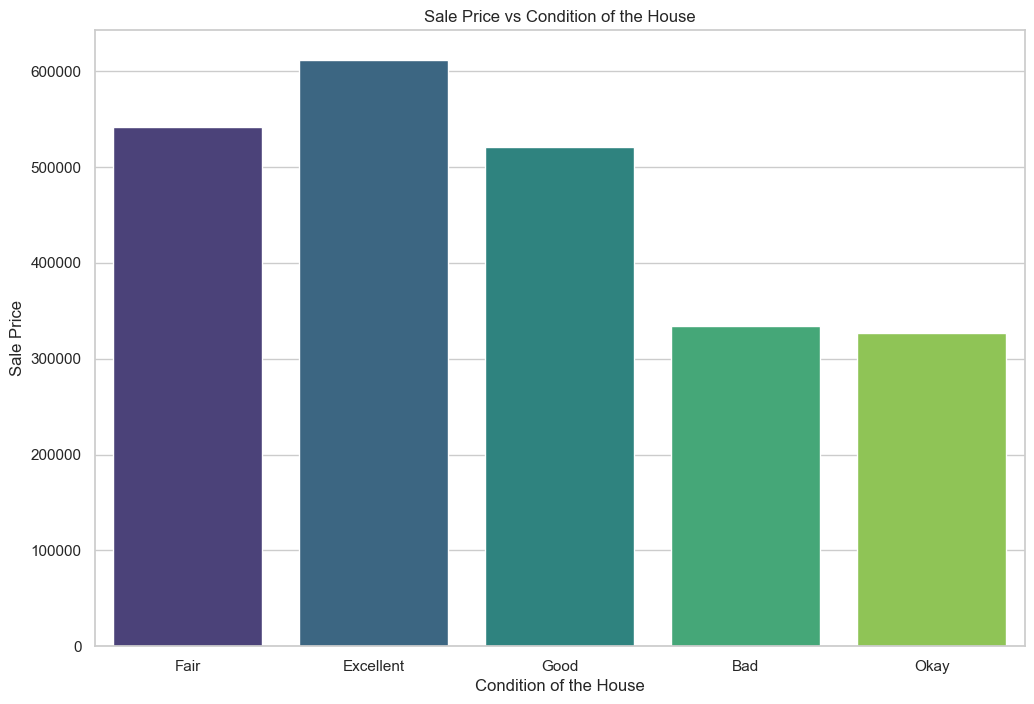

In [37]:
# Set up the plotting environment
plt.figure(figsize=(12, 8))

# Create a bar plot for Sale Price vs Condition of the House
sns.barplot(x='Condition of the House', y='Sale Price', data=df, palette='viridis', ci=None)

# Customize the plot
plt.title('Sale Price vs Condition of the House')
plt.xlabel('Condition of the House')
plt.ylabel('Sale Price')

# Show the plot
plt.show()

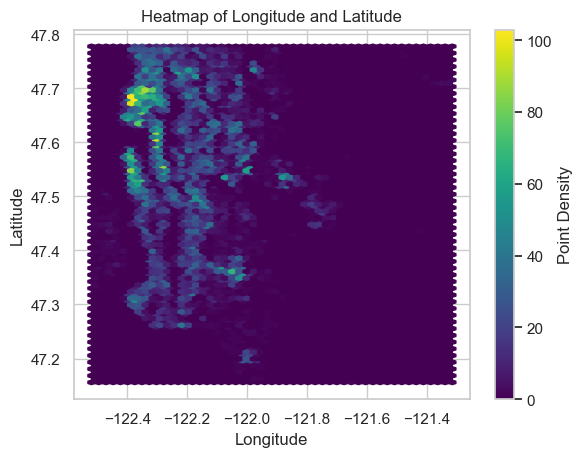

In [38]:
# Heatmap for 'Latitude' and 'Longitude' column
plt.hexbin(df['Longitude'], df['Latitude'], gridsize=(50, 50), cmap='viridis')
plt.title('Heatmap of Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Point Density')
plt.show()

# Handling Outliers

In [39]:
# List of columns for which you want to apply capping
columns_for_capping = [
    'Sale Price',
    'No of Bedrooms',
    'No of Bathrooms',
    'Overall Grade',
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'Area of the House from Basement (in Sqft)',
    'Basement Area (in Sqft)',
    'Living Area after Renovation (in Sqft)'
]

# Define a function for capping
def cap_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return x.clip(lower=lower_bound, upper=upper_bound)

# Apply the capping function to the specified columns
df[columns_for_capping] = df[columns_for_capping].apply(cap_outliers)

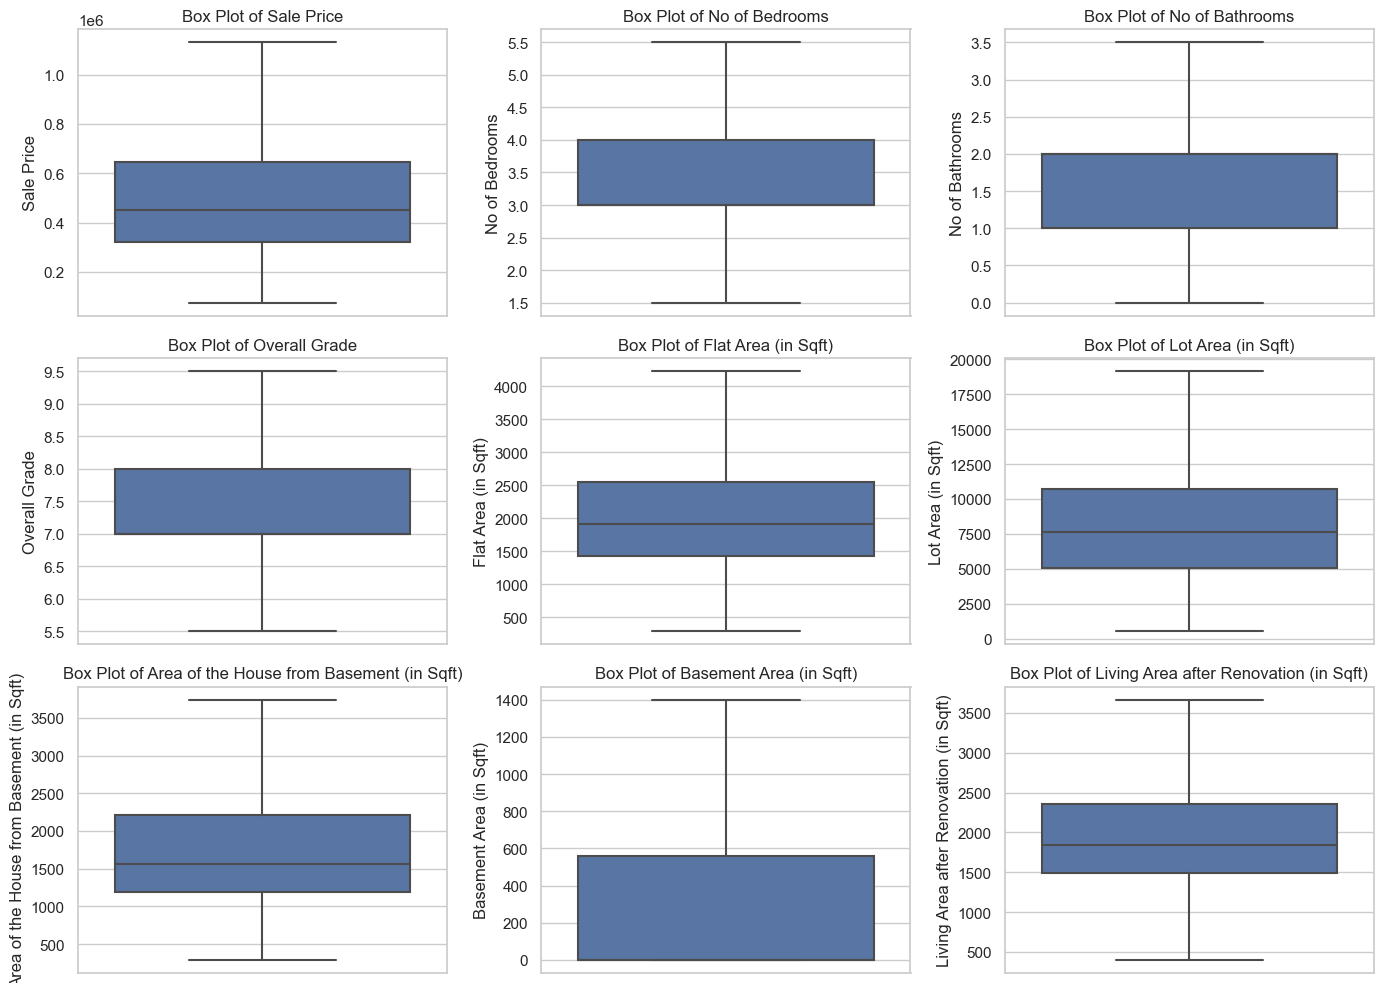

In [40]:
# List of columns for which you want box plots
columns_for_boxplot = [
    'Sale Price',
    'No of Bedrooms',
    'No of Bathrooms',
    'Overall Grade',
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'Area of the House from Basement (in Sqft)',
    'Basement Area (in Sqft)',
    'Living Area after Renovation (in Sqft)'
]

# Set up the plotting environment
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Plot box plots for each column
for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(3, 3, i)  # Adjusted the subplot layout to 3 rows and 3 columns
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [41]:
# Dropping 'Date House was Sold' column
df = df.drop(columns='Date House was Sold', axis=1)

# Standardization

In [42]:
# Extracting numerical columns from the dataset
numerical_columns = [i for i in df.columns if df[i].dtype != 'object']
numerical_columns

['Sale Price',
 'No of Bedrooms',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'No of Floors',
 'Overall Grade',
 'Area of the House from Basement (in Sqft)',
 'Basement Area (in Sqft)',
 'Age of House (in Years)',
 'Renovated Year',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)',
 'Lot Area after Renovation (in Sqft)']

In [43]:
# Applying Standardization
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform them
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [44]:
# scaler.mean_ stores the means of the original features after scaling or standardization
scaler.mean_

array([ 5.11616272e+05,  3.36318350e+00,  1.73626043e+00,  2.05799435e+03,
        8.70719359e+03,  1.44610751e+00,  7.59599166e+00,  1.76961381e+03,
        2.84025765e+02,  4.70032901e+01,  8.42545876e+01,  9.80779254e+04,
        4.75599862e+01, -1.22213850e+02,  1.97502164e+03,  1.27753420e+04])

In [45]:
# See data after standardization
df.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,-1.157872,-0.425244,-1.064873,-1.046616,-0.605807,-0.808485,No,None,Fair,-0.595015,-0.771836,-0.681049,0.544748,-0.209935,1.870114,-0.352072,-0.306363,-0.978403,-0.260791
1,0.105444,-0.425244,0.381454,0.610338,-0.290340,1.003825,No,None,Fair,-0.595015,0.524127,0.278088,0.680963,4.750999,0.879692,1.161975,-0.746561,-0.439144,-0.187992
2,-1.325328,-1.596124,-1.064873,-1.535358,0.256180,-0.808485,No,None,Fair,-1.593376,-1.308547,-0.681049,1.293931,-0.209935,-0.932966,1.283936,-0.135964,1.147817,-0.172510
3,0.369218,0.745636,1.827780,-0.116814,-0.734610,-0.808485,No,None,Excellent,-0.595015,-0.942012,1.500988,0.204211,-0.209935,1.085252,-0.282792,-1.271958,-0.947588,-0.284581
4,-0.006460,-0.425244,0.381454,-0.450589,-0.124283,-0.808485,No,None,Fair,0.403346,-0.117309,-0.681049,-0.544972,-0.209935,-0.073355,0.410003,1.198829,-0.269663,-0.192970


In [46]:
# Generate descriptive statistics for each column in DataFrame 'df' and round the results to one decimal place using NumPy
np.round(df.describe(), 1)

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,21580.0,21580.0,21580.0,21580.0,21580.0,21580.0,21580.0,21580.0,21580.0,21580.0,21580.0,21580.0,21580.0,21580.0,21580.0,21580.0
mean,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.7,-2.2,-2.5,-2.1,-1.6,-0.8,-2.1,-1.9,-0.7,-1.5,-0.2,-1.4,-2.9,-2.2,-2.4,-0.4
25%,-0.8,-0.4,-1.1,-0.7,-0.7,-0.8,-0.6,-0.8,-0.7,-0.9,-0.2,-0.8,-0.6,-0.8,-0.7,-0.3
50%,-0.2,-0.4,0.4,-0.2,-0.2,-0.8,-0.6,-0.3,-0.7,-0.1,-0.2,-0.2,0.1,-0.1,-0.2,-0.2
75%,0.5,0.7,0.4,0.6,0.4,1.0,0.4,0.6,0.7,0.7,-0.2,0.7,0.9,0.6,0.6,-0.1
max,2.5,2.5,2.6,2.6,2.1,2.8,1.9,2.6,2.7,2.4,4.8,2.3,1.6,6.4,2.6,31.4


# Encoding Categorical Columns

In [47]:
# See value_counts of 'Waterfront view' column
df['Waterfront View'].value_counts()

No     21417
Yes      163
Name: Waterfront View, dtype: int64

In [48]:
# Applying binary encoder to encode 'Waterfront View' values
binary_encoder = ce.BinaryEncoder(cols=['Waterfront View'])
df = binary_encoder.fit_transform(df)

In [49]:
# Extracting the columns after conversion
desired_columns1 = df[['Waterfront View_0', 'Waterfront View_1']]
desired_columns1

,Waterfront View_0,Waterfront View_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
21608,0,1
21609,0,1
21610,0,1
21611,0,1


In [50]:
# After conversion categorical to numerical, converting dtype from object to int
df['Waterfront View_0'] = df['Waterfront View_0'].astype('int64')
df['Waterfront View_1'] = df['Waterfront View_1'].astype('int64')

In [51]:
# See value_counts of 'No of Times Visited' column
df['No of Times Visited'].value_counts()

None      19459
Twice       962
Thrice      509
Once        331
Four        319
Name: No of Times Visited, dtype: int64

In [52]:
# Create dummy variables for the 'No of Times Visited' column, dropping the first category, in the DataFrame 'df'
df = pd.get_dummies(df, columns=['No of Times Visited'], drop_first=True)

In [53]:
# Extracting the columns after conversion
desired_columns2 = df[['No of Times Visited_None', 'No of Times Visited_Once', 'No of Times Visited_Twice',
                     'No of Times Visited_Thrice']]
desired_columns2

,No of Times Visited_None,No of Times Visited_Once,No of Times Visited_Twice,No of Times Visited_Thrice
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
21608,1,0,0,0
21609,1,0,0,0
21610,1,0,0,0
21611,1,0,0,0


In [54]:
# After conversion categorical to numerical, converting dtype from object to int
df['No of Times Visited_None'] = df['No of Times Visited_None'].astype('int64')
df['No of Times Visited_Once'] = df['No of Times Visited_Once'].astype('int64')
df['No of Times Visited_Twice'] = df['No of Times Visited_Twice'].astype('int64')
df['No of Times Visited_Thrice'] = df['No of Times Visited_Thrice'].astype('int64')

In [55]:
# See value_counts of 'Condition of the House' column
df['Condition of the House'].value_counts()

Fair         14010
Good          5670
Excellent     1698
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [56]:
# Extract the categorical columns that you want to encode
categorical_columns = ['Condition of the House']

# Create an ordinal encoder instance
encoder = OrdinalEncoder()

# Fit and transform the encoder on the selected categorical columns
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

In [57]:
# Extracting the column after conversion
desired_columns3 = df[['Condition of the House']]
desired_columns3

,Condition of the House
0,2.0
1,2.0
2,2.0
3,1.0
4,2.0
...,...
21608,2.0
21609,2.0
21610,2.0
21611,2.0


In [58]:
# Print the mapping between original values and numerical representations
mapping = dict(zip(categorical_columns, encoder.categories_))
df1 = pd.DataFrame(mapping)
df1

,Condition of the House
0,Bad
1,Excellent
2,Fair
3,Good
4,Okay


In [59]:
# After conversion categorical to numerical, converting dtype from object to int
df['Condition of the House'] = df['Condition of the House'].astype('int64')

In [60]:
# This code calculates the correlation of each numeric column with the 'Sale Price' column in the DataFrame 'df'
df.corr()['Sale Price']

Sale Price                                   1.000000
No of Bedrooms                               0.352366
No of Bathrooms                              0.497581
Flat Area (in Sqft)                          0.701026
Lot Area (in Sqft)                           0.171951
No of Floors                                 0.274986
Waterfront View_0                            0.156206
Waterfront View_1                           -0.156206
Condition of the House                      -0.076683
Overall Grade                                0.680425
Area of the House from Basement (in Sqft)    0.602399
Basement Area (in Sqft)                      0.294211
Age of House (in Years)                     -0.064340
Renovated Year                               0.122209
Zipcode                                     -0.043216
Latitude                                     0.402297
Longitude                                    0.045345
Living Area after Renovation (in Sqft)       0.626286
Lot Area after Renovation (i

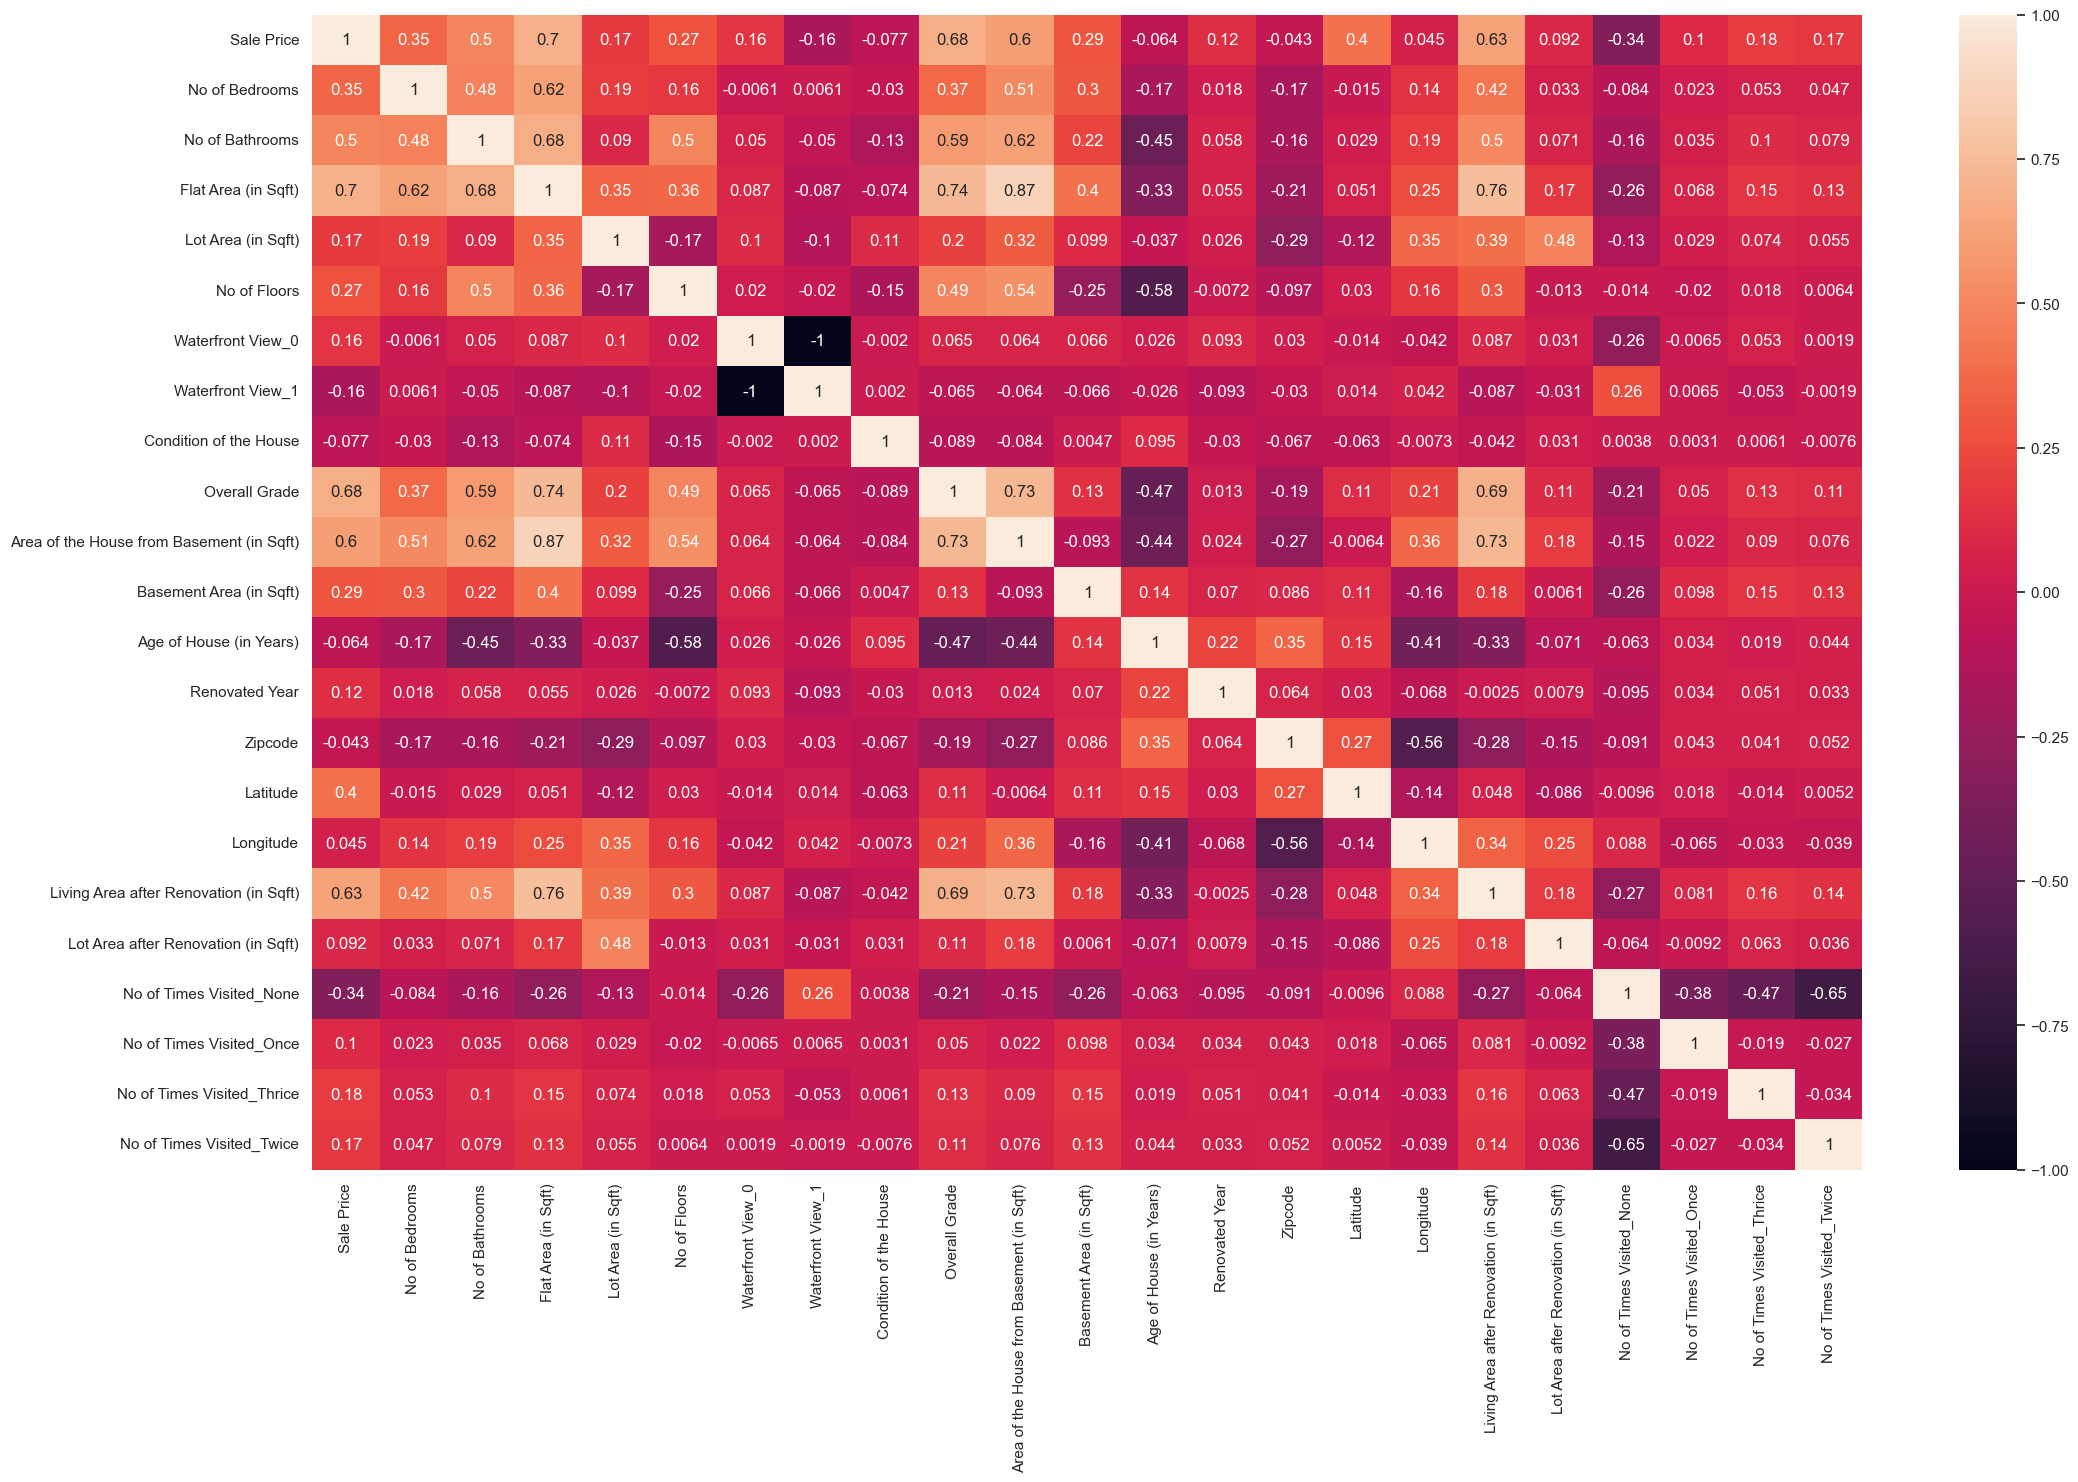

In [61]:
# This code creates a heatmap visualization of the correlation matrix for the DataFrame 'df' 
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Splitting Data into Training and Testing 

In [62]:
# Splitting the data
y = df["Sale Price"]
X = df.drop("Sale Price", axis = 1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# See the shape of X_train and X_test data
X_train.shape, X_test.shape

((17264, 22), (4316, 22))

In [65]:
# See the shape of y_train and y_test data
y_train.shape, y_test.shape

((17264,), (4316,))

In [66]:
# Stores the X_test shape value in two variables 'n' and 'k'
n = 4316
k = 22

# Linear Regression Algorithm

In [67]:
"""Train a Linear Regression model, make predictions, and evaluate its performance using MAE, MSE, RMSE, R-squared, and 
adjusted R-squared."""


# Initialize and train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
mae1 = mean_absolute_error(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
rmse1 = sqrt(mse1)

r1 = r2_score(y_test, y_pred)
adjusted_r2_score1 = 1 - (((1 - r1) * (n - 1)) / (n - 1 - k))

print(f'Mean Squared Error: {mse1}')
print(f'Mean Absolute Error (MAE): {mae1}')
print(f'Root Mean Squared Error (RMSE): {rmse1}')
print(f'R-squared (R2) Score:" {r1}')
print(f'adjusted r2 score:" {adjusted_r2_score1}')

Mean Squared Error: 0.25797890136689455
Mean Absolute Error (MAE): 0.38334304739454234
Root Mean Squared Error (RMSE): 0.5079162345967045
R-squared (R2) Score:" 0.7549651734366403
adjusted r2 score:" 0.7537094627018641


# Random Forest Regressor Algorithm

In [68]:
"""This code initializes and trains a Random Forest regression model with 100 estimators, makes predictions, and calculates 
evaluation metrics including MAE, MSE, R2 score, and RMSE, then prints the results to assess the model's performance."""

rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
rf.fit(X_train, y_train)

# Make predictions using the Random Forest model
y_pred_rf = rf.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)
adjusted_r2_score = 1 - (((1 - r2_rf) * (n - 1)) / (n - 1 - k))

print(f'Mean Absolute Error (MAE): {mae_rf}')
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'R-squared (R2) Score: {r2_rf}')
print(f'adjusted r2 score: {adjusted_r2_score}')

Mean Absolute Error (MAE): 0.22871200839447106
Mean Squared Error (MSE): 0.11665622181833578
Root Mean Squared Error (RMSE): 0.3415497354973881
R-squared (R2) Score: 0.8891969966174105
adjusted r2 score: 0.8886291731665796


# Decision Tree Regressor Algorithm 

In [69]:
"""Initialize and train a Decision Tree Regressor, make predictions, and evaluate its performance using various metrics MAE, 
MSE, RMSE, R-squared, and adjusted R-squared."""

# Initialize Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
adjusted_r2_score1 = 1 - (((1 - r1) * (n - 1)) / (n - 1 - k))

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2) Score: {r2}')
print(f'adjusted r2 score: {adjusted_r2_score}')

Mean Squared Error: 0.23585482917340053
Mean Absolute Error: 0.32296118963772263
Root Mean Squared Error: 0.4856488743664506
R-squared (R2) Score: 0.7759791717290747
adjusted r2 score: 0.8886291731665796
